In [2]:
import pandas as pd
import semantic_version

# Load data set into data frame
data_source = "bq-results-20240420-125551-1713617779846.csv"
df = pd.read_csv(data_source)
total_rows = len(df)
print(f"There are {total_rows:,} rows.")

There are 628,199 rows.


In [3]:
def parse_semantic(version):
    try:
        return semantic_version.Version(version)
    except ValueError:
        return None


In [4]:
# Parse and filter versions for semantic
df["semantic"] = df['latest_version'].apply(parse_semantic)
df = df[df.semantic.notnull()]
total_semantic = len(df)
print(f"There are {total_semantic:,} semantic versions. {total_semantic/total_rows:%} of total.")

There are 465,352 semantic versions. 74.077163% of total.


In [5]:
counts = [
    *(len(df[df['semantic'].apply(lambda x: x.major == major)]) for major in range(3)),
    len(df[df['semantic'].apply(lambda x: x.major > 2)])
]

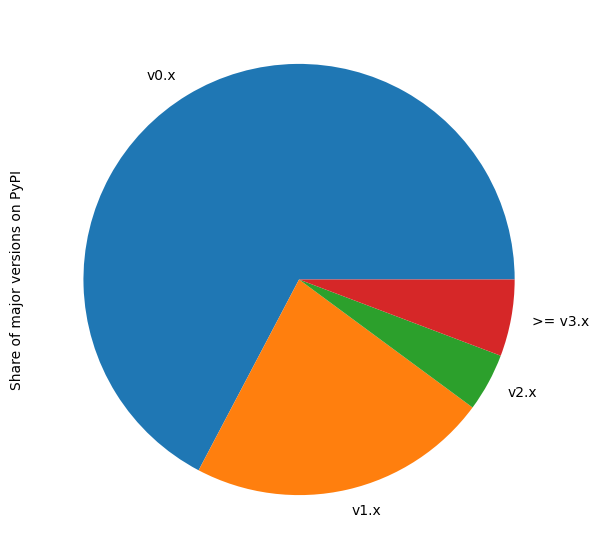

In [15]:
summary_table = pd.DataFrame(
    {
         
        "count": counts, 
        "percentage": (f"{c / total_semantic:%}" for c in counts)
    },
    index=["v0.x", "v1.x", "v2.x", ">= v3.x"],
)
summary_table
plot = summary_table.plot.pie(y='count', figsize=(7, 7), legend=False, ylabel="Share of major versions on PyPI")

In [79]:
number_below_v2 = len(df[df.semantic.apply(lambda x: x.major < 2)])
print(f"There are {number_below_v2:,} semantic packages below v2.")
print(f"That is {number_below_v2/total_semantic:%} of all valid semantic versions on PyPI")

There are 418,285 semantic packages below v2.
That is 89.885721% of all valid semantic versions on PyPI
